In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import seaborn as sns
import pandas as pd
import awkward as ak
from glob import glob

In [2]:
from analysis.convert import root_to_numpy

In [3]:
paths_durham = glob("C:\\DevRepositories\\jc_results\\*_MisclusteringSigDurham.root")
paths_gnn = glob("C:\\DevRepositories\\jc_results\\*_MisclusteringSigGNN.root")

In [46]:
some_dict = {
    0.: ['A', 'A'],
    1.: ['A', 'B'],
    2.: ['A', 'C'],
    3.: ['A', 'D'],
    4.: ['B', 'B'],
    5.: ['B', 'C'],
    6.: ['B', 'D'],
    7.: ['C', 'C'],
    8.: ['C', 'D'],
    9.: ['D', 'D'],
}

def reg_num_to_arr(num):
    return some_dict[num]

In [ ]:
df = pd.DataFrame(results)

In [99]:
raw = {
    'gnn': paths_gnn,
    'reco': paths_durham
}
results = {
    'gnn_x': [],
    'gnn_y': [],
    'gnn_region': [],
    'gnn_dijet_mass': [],
    'reco_x': [],
    'reco_y': [],
    'reco_region': [],
    'reco_dijet_mass': [],
}

for key in raw:
    x_all = []
    y_all = []
    groups_all = []
    dijet_masses = []
    
    for path in raw[key]:
        with ur.open(path) as file:
            if len(file.keys()) > 0:
                data = file['eventTree']
                
                x = ak.flatten(data['energyfrac_true_ICNs'].array(), axis=None).to_list()
                y = ak.flatten(data['energyfrac_reco_ICNs'].array(), axis=None).to_list()
                
                groups_raw = ak.flatten(data['regionXX_ICNs'].array(), axis=None).to_list()
                #groups_raw = ak.flatten(data['regionXX'].array(), axis=None).to_list()
                groups = []
                
                print(len(x), len(groups_raw))
                for group in groups_raw:
                    groups = groups + reg_num_to_arr(group)
                    
                print(len(groups))
                dijet_mass = ak.flatten(data['recodijetmass'].array(), axis=None).to_list()
                
                x_all = x_all + x
                y_all = y_all + y
                groups_all = groups_all + groups
                dijet_masses = dijet_masses + dijet_mass
            
    results[f'{key}_x'] = x_all
    results[f'{key}_y'] = y_all
    results[f'{key}_region'] = groups_all
    results[f'{key}_dijet_mass'] = dijet_masses

4792 2396
4792
4792 2396
4792


In [100]:
data.keys()

['run',
 'event',
 'nrecodijetPFOs',
 'ntruedijetPFOs',
 'overlap',
 'recodijetmass',
 'truedijetmass',
 'energyfrac_reco',
 'energyfrac_true',
 'nrecodijetPFOs_ICNs',
 'ntruedijetPFOs_ICNs',
 'overlap_ICNs',
 'recodijetmass_ICNs',
 'truedijetmass_ICNs',
 'energyfrac_reco_ICNs',
 'energyfrac_true_ICNs',
 'y_45',
 'y_34',
 'sumofangles',
 'recodijet_energy',
 'recodijet_theta',
 'recodijet_phi',
 'recodijet_energy_ICNs',
 'recodijet_theta_ICNs',
 'recodijet_phi_ICNs',
 'regionXX',
 'regionXX_ICNs']

In [101]:
for key in results.keys():
    print(key, len(results[key]))

gnn_x 4792
gnn_y 4792
gnn_region 4792
gnn_dijet_mass 4792
reco_x 4792
reco_y 4792
reco_region 4792
reco_dijet_mass 4792


In [102]:
df = pd.DataFrame(results)

Text(0.5, 1.0, 'Durham (LCFIPlus)')

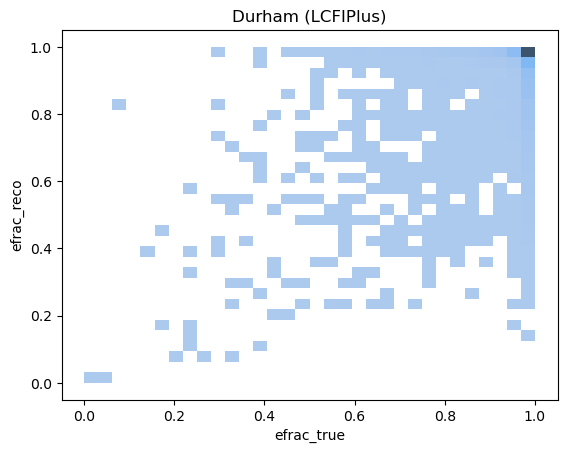

In [103]:
ax = sns.histplot(df, x='reco_x', y='reco_y', bins=(32, 32))
ax.set_xlabel('efrac_true')
ax.set_ylabel('efrac_reco')
ax.set_title('Durham (LCFIPlus)')

Text(0.5, 1.0, 'GNN+SC')

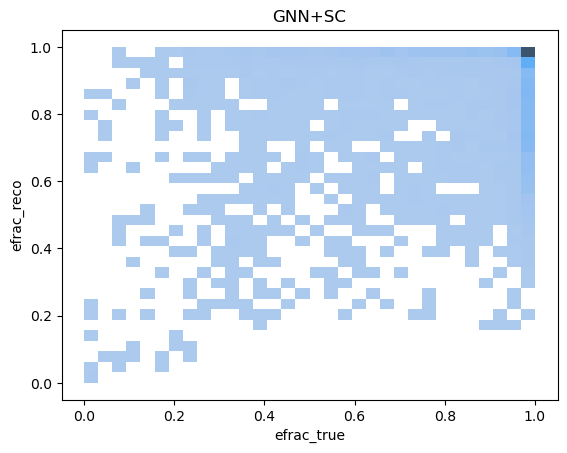

In [104]:
ax = sns.histplot(df, x='gnn_x', y='gnn_y', bins=(32, 32))
ax.set_xlabel('efrac_true')
ax.set_ylabel('efrac_reco')
ax.set_title('GNN+SC')

(0.0, 0.035)

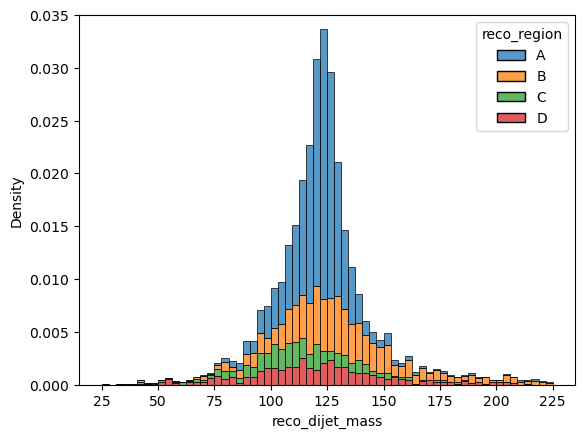

In [105]:
plot_args = {
    'multiple': 'stack',
    'bins': 64,
    'stat':'density',
    'hue_order': ['A', 'B', 'C', 'D'],
    'binrange': (25, 225),
}
ax = sns.histplot(df, x='reco_dijet_mass', hue='reco_region', **plot_args)
plt.ylim((0, .035))

(0.0, 0.035)

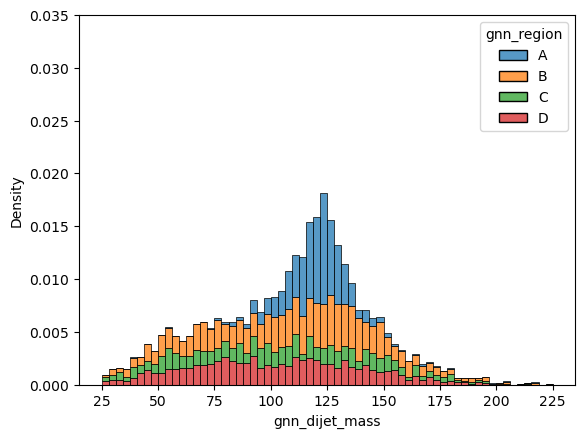

In [106]:
ax = sns.histplot(df, x='gnn_dijet_mass', hue='gnn_region', **plot_args)
plt.ylim((0, .035))